In [1]:
from sas7bdat import SAS7BDAT
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import folium

In [2]:
#with SAS7BDAT('Desktop/HealthDataProject/data1.sas7bdat') as f:
#    df = f.to_data_frame()

In [3]:
!ls desktop/HealthDataProject/familyxx.csv

desktop/HealthDataProject/familyxx.csv






data and documentation located at: https://www.cdc.gov/nchs/nhis/nhis_2016_data_release.htm





In [4]:
data = pd.read_csv('desktop/HealthDataProject/familyxx.csv' , sep=',')

data.shape
data.head(5)

,FINT_Y_P,FINT_M_P,FMX,RECTYPE,SRVY_YR,HHX,FM_SIZE,FM_STRCP,FM_TYPE,FM_STRP,...,COVCONF,FHICOST,FMEDBILL,FMEDBPAY,FMEDBNOP,FSAF,FHICOVCT,FHICOVYN,FPRCOOH,FHIEBCCT
0,2016,1,1,60,2016,1,2,22,2,22,...,3.0,1,2,2,NaN,2,2,1,2.0,2.0
1,2016,1,2,60,2016,1,1,12,1,12,...,2.0,1,2,2,NaN,2,1,1,2.0,1.0
2,2016,3,1,60,2016,2,1,11,1,11,...,NaN,1,2,2,NaN,2,1,1,NaN,NaN
3,2016,2,1,60,2016,3,2,23,2,23,...,NaN,2,1,2,1.0,2,2,1,NaN,0.0
4,2016,3,1,60,2016,5,3,31,3,31,...,4.0,3,1,1,1.0,2,3,1,2.0,3.0


In [5]:
fam_df = pd.DataFrame(data)

In [6]:
fam_df.columns

Index(['FINT_Y_P', 'FINT_M_P', 'FMX', 'RECTYPE', 'SRVY_YR', 'HHX', 'FM_SIZE',
       'FM_STRCP', 'FM_TYPE', 'FM_STRP',
       ...
       'COVCONF', 'FHICOST', 'FMEDBILL', 'FMEDBPAY', 'FMEDBNOP', 'FSAF',
       'FHICOVCT', 'FHICOVYN', 'FPRCOOH', 'FHIEBCCT'],
      dtype='object', length=127)

Column labels correspond to questions in the survey and are decripted here: ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NHIS/2016/familyxx_summary.pdf

In [7]:
fam = data['HHX'].unique().tolist()
len(fam)

40220

40,220 families were included in this survey

### Descriptive Statistics about several poll question answers

In [8]:
fam_df['FM_SIZE'].describe()

count    40875.000000
mean         2.377223
std          1.437707
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         18.000000
Name: FM_SIZE, dtype: float64

In [9]:
fam_df['FM_KIDS'].describe()

count    40875.000000
mean         0.562544
std          1.034853
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         12.000000
Name: FM_KIDS, dtype: float64

In [10]:
filter_1 = fam_df['FM_KIDS'] > 11

In [11]:
fam_df[filter_1]

,FINT_Y_P,FINT_M_P,FMX,RECTYPE,SRVY_YR,HHX,FM_SIZE,FM_STRCP,FM_TYPE,FM_STRP,...,COVCONF,FHICOST,FMEDBILL,FMEDBPAY,FMEDBNOP,FSAF,FHICOVCT,FHICOVYN,FPRCOOH,FHIEBCCT
23556,2016,9,1,60,2016,40758,15,45,4,45,...,NaN,1,2,1,NaN,2,0,2,NaN,NaN


## Is there a correlation between # of working cellphones and # of kids?

In [12]:
phone_filter = fam_df['WRKCELN']<20

fam_concat = fam_df[phone_filter]

#fam_concat.head()

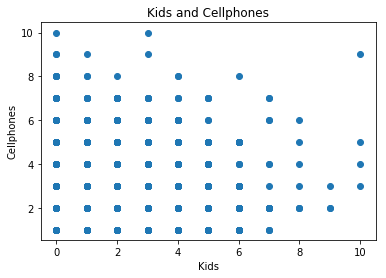

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt

fig,axis = plt.subplots()

axis.set(title='Kids and Cellphones',
         ylabel='Cellphones',
         xlabel='Kids')

X = fam_concat['FM_KIDS']
Y = fam_concat['WRKCELN']

axis.scatter(X, Y)
plt.show()

In [70]:
np.corrcoef(fam_concat['WRKCELN'],fam_concat['FM_KIDS'])

array([[ 1.        ,  0.35695428],
       [ 0.35695428,  1.        ]])

## Recieving SS and elderly family member correlation?

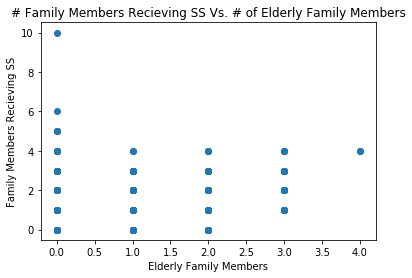

In [90]:
fig,axis = plt.subplots()

axis.set(title='# Family Members Recieving SS Vs. # of Elderly Family Members',
         ylabel='Family Members Recieving SS',
         xlabel='Elderly Family Members')

Y = fam_df['FSSRRCT']
X = fam_df['FM_ELDR']

axis.scatter(X, Y)
plt.show()

In [88]:
np.corrcoef(fam_df['FSSRRCT'],fam_df['FM_ELDR'])

array([[ 1.        ,  0.80448367],
       [ 0.80448367,  1.        ]])

## Distribution of families' ratio of income to poverty threshold (outliers excluded)

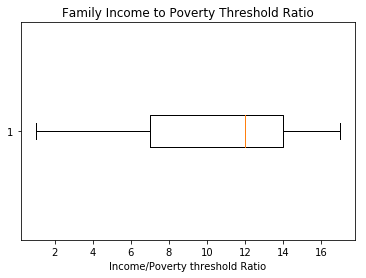

In [95]:
plt.boxplot(fam_df['RAT_CAT4'],0,'','')
plt.title("Family Income to Poverty Threshold Ratio")
plt.xlabel("Income/Poverty threshold Ratio")
plt.show()